### Sepehr Rezaee - 99242067

# 1st question

### Import and intialize dependencies

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the neuron population size, time steps, and input currents
num_neurons = 15
num_timesteps = 100

# Define the connection methods and their parameters
connection_methods = [
    ('Full connectivity with scaling', {}),
    ('Full connectivity with Gaussian distribution', {}),
    ('Random connectivity with fixed coupling probability', {'probability': 0.5}),
    ('Random connectivity with fixed number of presynaptic partners', {'num_connections': 5}),
]

### Generating the input currents

In [ ]:
def constant_current(num_neurons, num_timesteps, current_value=1.0):
    return torch.ones(num_timesteps, num_neurons) * current_value

def step_current(num_neurons, num_timesteps, step_time, current_value=1.0):
    current = torch.zeros(num_timesteps, num_neurons)
    current[step_time:] = current_value
    return current

def sinusoidal_current(num_neurons, num_timesteps, frequency, amplitude=1.0, phase=0.0):
    time = torch.arange(0, num_timesteps).float()
    sinusoidal = amplitude * torch.sin(2 * np.pi * frequency * time / num_timesteps + phase)
    return sinusoidal.view(-1, 1).repeat(1, num_neurons)

input_currents = [
    ('Constant current', constant_current(num_neurons, num_timesteps, current_value=1.0)),
    ('Step current', step_current(num_neurons, num_timesteps, step_time=50, current_value=1.0)),
    ('Sinusoidal current', sinusoidal_current(num_neurons, num_timesteps, frequency=0.1, amplitude=1.0, phase=0.0)),
]

### Defining the methods of connection between the neurons

In [ ]:
class NeuronModel(torch.nn.Module):
    def __init__(self, threshold=1.0, decay=0.9):
        super(NeuronModel, self).__init__()
        self.threshold = threshold
        self.decay = decay

    def forward(self, input_current, state):
        state = state * self.decay + input_current
        spike = (state >= self.threshold).float()
        state = state * (1 - spike)
        return spike, state

def generate_connectivity_matrix(method, num_neurons, **kwargs):
    if method == 'Full connectivity with scaling':
        return torch.ones(num_neurons, num_neurons) / num_neurons
    elif method == 'Full connectivity with Gaussian distribution':
        return torch.randn(num_neurons, num_neurons)
    elif method == 'Random connectivity with fixed coupling probability':
        probability = kwargs.get('probability', 0.5)
        return torch.bernoulli(torch.ones(num_neurons, num_neurons) * probability)
    elif method == 'Random connectivity with fixed number of presynaptic partners':
        num_connections = kwargs.get('num_connections', 5)
        matrix = torch.zeros(num_neurons, num_neurons)
        for i in range(num_neurons):
            indices = np.random.choice(num_neurons, num_connections, replace=False)
            matrix[i, indices] = 1
        return matrix
    else:
        raise ValueError(f"Unknown connection method: {method}")

### Simulate and plot the neuron populations activity and generate data



In [ ]:
def simulate_neuron_population(connectivity_matrix, input_currents, num_neurons, num_timesteps):
    neuron_model = NeuronModel()
    state = torch.zeros(num_neurons)
    spikes_history = []

    for t in range(num_timesteps):
        input_current = input_currents[t]
        spikes, state = neuron_model(input_current, state)
        state = torch.matmul(connectivity_matrix, state)
        spikes_history.append(spikes)

    return torch.stack(spikes_history)

def plot_raster_plot(spikes, title):
    plt.figure()
    plt.imshow(spikes.t(), cmap='gray_r', aspect='auto')
    plt.xlabel('Time step')
    plt.ylabel('Neuron index')
    plt.title(title)
    plt.show()

## Running the simulation for each connection method and input current, and plot the raster plots

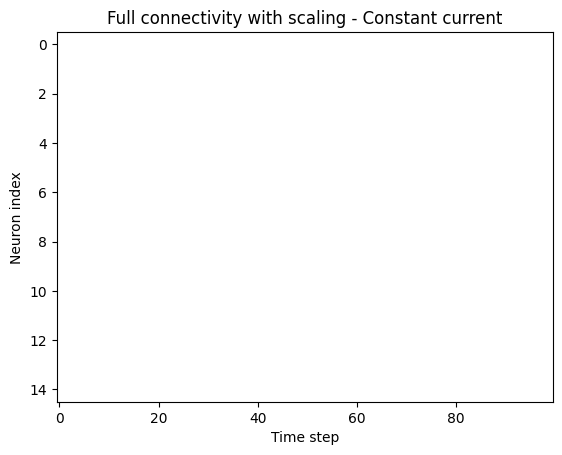

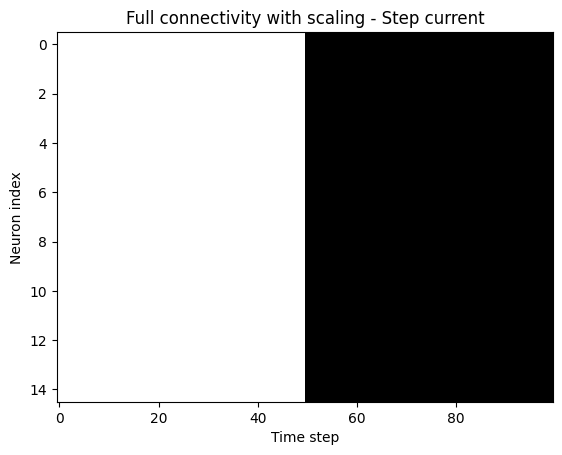

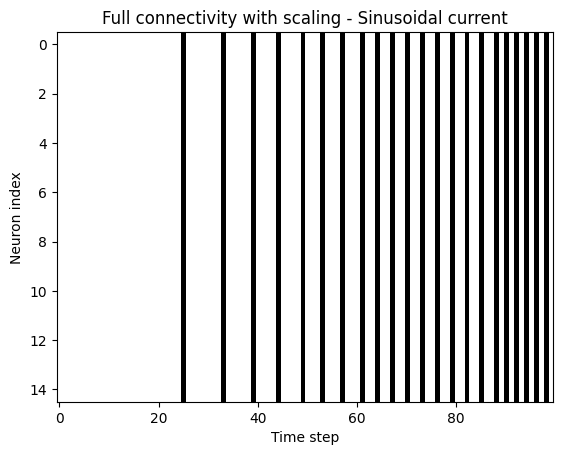

------------------------------------------------------------------------------------------------------------------------------------------------------


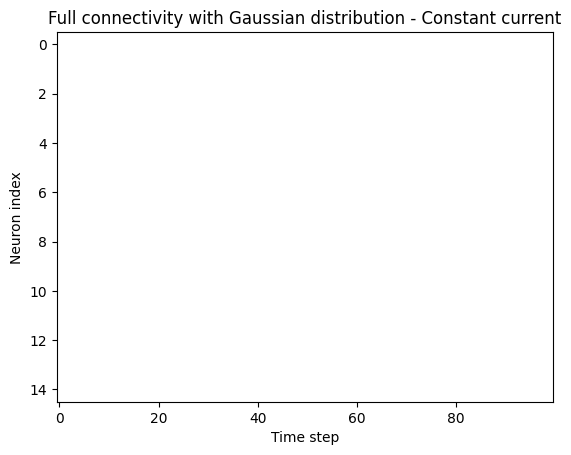

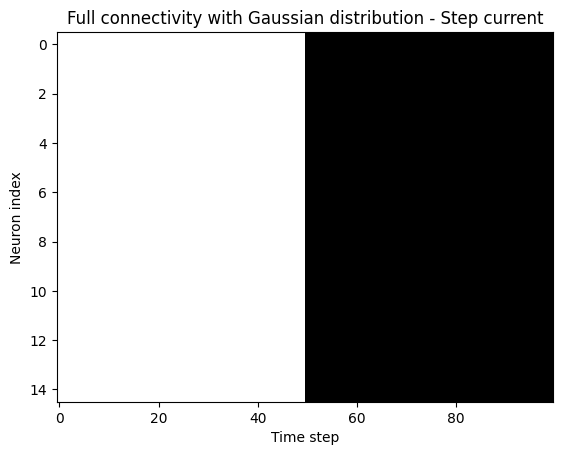

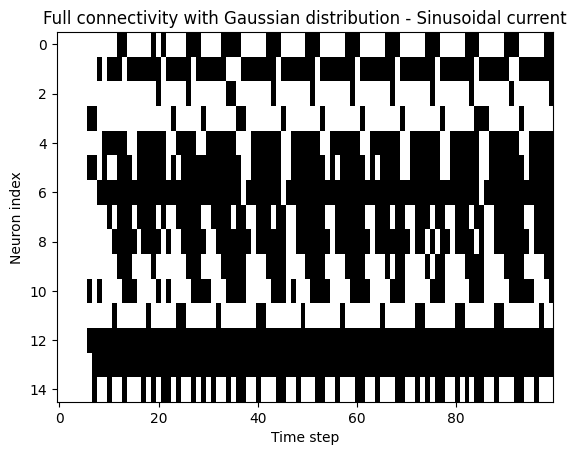

------------------------------------------------------------------------------------------------------------------------------------------------------


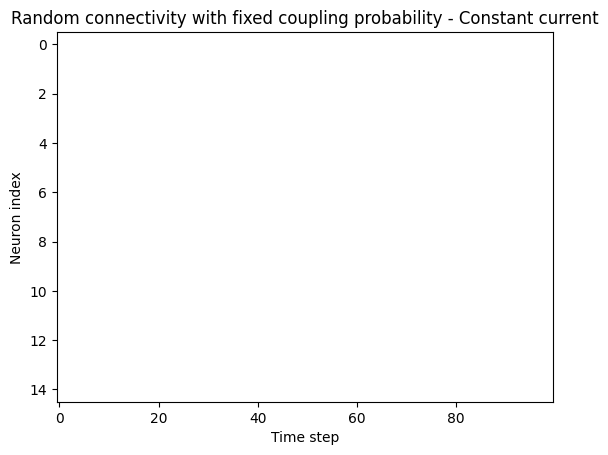

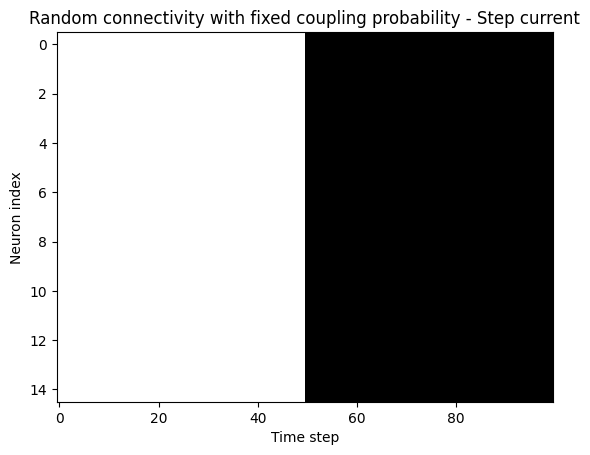

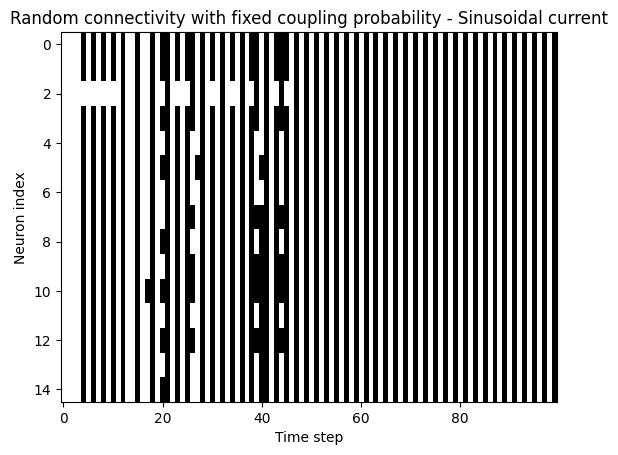

------------------------------------------------------------------------------------------------------------------------------------------------------


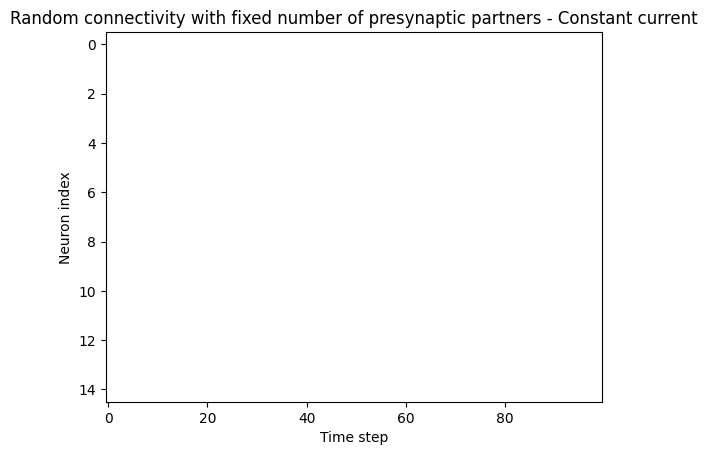

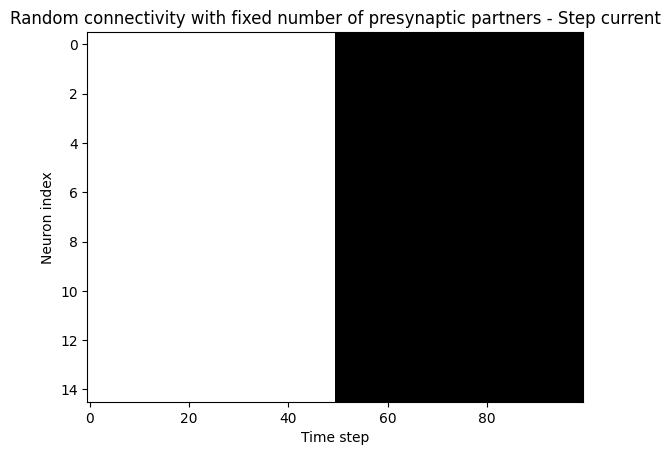

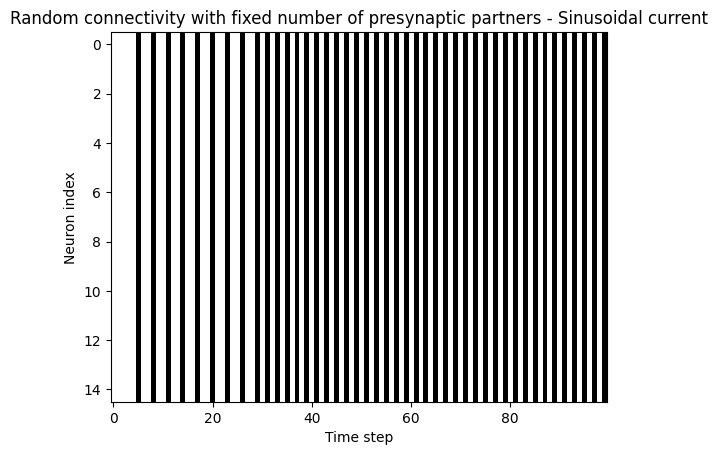

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Run the simulation for each connection method and input current
for method, params in connection_methods:
    connectivity_matrix = generate_connectivity_matrix(method, num_neurons, **params)

    for current_name, current in input_currents:
        spikes = simulate_neuron_population(connectivity_matrix, current, num_neurons, num_timesteps)
        plot_raster_plot(spikes, f'{method} - {current_name}')
    print('-'*150)

# 2nd question

### Initialize the dependencies

In [ ]:
# Define the neuron population sizes and time steps
num_excitatory_neurons1 = 50
num_excitatory_neurons2 = 50
num_inhibitory_neurons = 20
num_timesteps = 250

### Generate the neuron populations

In [ ]:
# Generate connectivity matrices for the populations
excitatory_connectivity1 = generate_connectivity_matrix('Random connectivity with fixed coupling probability', num_excitatory_neurons1, probability=0.5)
excitatory_connectivity2 = generate_connectivity_matrix('Random connectivity with fixed coupling probability', num_excitatory_neurons2, probability=0.5)
inhibitory_connectivity = generate_connectivity_matrix('Random connectivity with fixed coupling probability', num_inhibitory_neurons, probability=0.5)

### Generate the inpute currents with constant noise

In [ ]:
# Generate the input currents with added uniform noise
base_current = constant_current(num_excitatory_neurons1, num_timesteps, current_value=1.0)
noise1 = torch.rand(num_timesteps, num_excitatory_neurons1) * 0.5
noise2 = torch.rand(num_timesteps, num_excitatory_neurons1) * 0.5

input_currents1 = base_current + noise1
input_currents2 = base_current + noise2

### Simulate and plot the activity of the populations

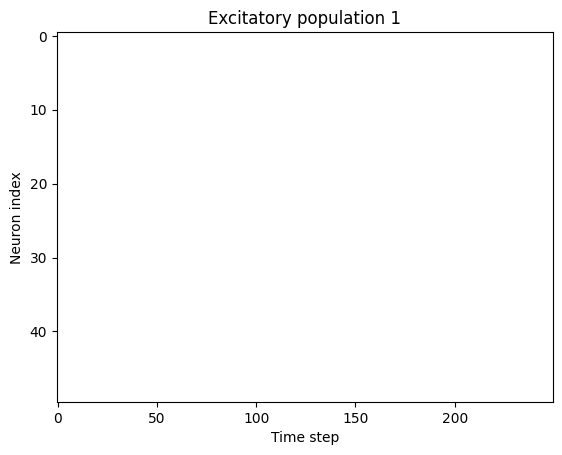

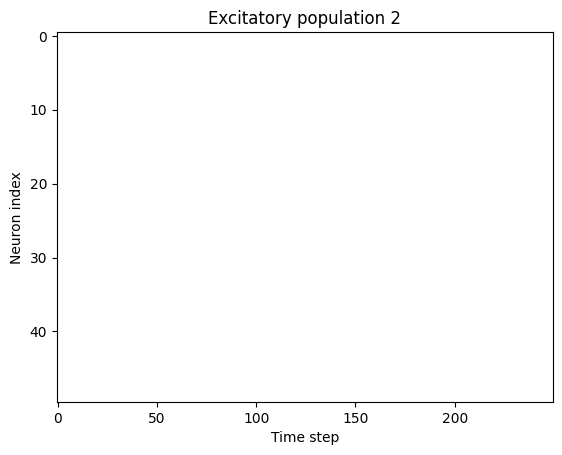

In [ ]:
# Simulate the neuron populations with the given input currents
spikes_excitatory1 = simulate_neuron_population(excitatory_connectivity1, input_currents1, num_excitatory_neurons1, num_timesteps)
spikes_excitatory2 = simulate_neuron_population(excitatory_connectivity2, input_currents2, num_excitatory_neurons2, num_timesteps)

# Plot the raster diagrams for the two excitatory populations
plot_raster_plot(spikes_excitatory1, 'Excitatory population 1')
plot_raster_plot(spikes_excitatory2, 'Excitatory population 2')


### در این مثال، نقش جمعیت بازدارنده در تصمیم گیری را می توان به عنوان محدود کننده فعالیت جمعیت های تحریک کننده توصیف کرد. جمعیت بازدارنده می تواند فعالیت جمعیت های تحریک کننده را سرکوب کند و از اسپایک بیش از حد آنها جلوگیری کند و تعادل را در شبکه حفظ کند. این تعادل می تواند برای فرآیندهای تصمیم گیری بسیار مهم باشد، زیرا به جلوگیری از تحریک فرار کمک می کند و به شبکه اجازه می دهد تا تصمیمات دقیق تری بر اساس محرک های ورودی بگیرد.

# 3rd question

### Define the current inputs

In [ ]:
currents = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

## Create the neural population models for each coding method

### Poisson Encoding

In [ ]:
def poisson_encoding(currents, dt=1e-3, duration=1.0, tau_m=20e-3, tau_s=5e-3):
    time = torch.arange(0, duration, dt)
    num_neurons = currents.shape[0]
    spike_trains = torch.zeros((num_neurons, len(time)))

    for i, current in enumerate(currents):
        rate = torch.exp(current)
        spike_probs = rate * dt
        spikes = torch.rand(len(time)) < spike_probs
        spike_trains[i] = spikes

    return spike_trains

### Time to First Spike Encoding

In [ ]:
def time_to_first_spike_encoding(currents, dt=1e-3, duration=1.0, tau_m=20e-3, tau_s=5e-3):
    time = torch.arange(0, duration, dt)
    num_neurons = currents.shape[0]
    spike_trains = torch.zeros((num_neurons, len(time)))

    for i, current in enumerate(currents):
        rate = torch.exp(current)
        first_spike_time = torch.tensor(1.0 / rate)
        spike_time_idx = int(first_spike_time / dt)
        if spike_time_idx < len(time):
            spike_trains[i, spike_time_idx] = 1

    return spike_trains

### Rank Order Coding

In [ ]:
def rank_order_coding(currents, dt=1e-3, duration=100.0, tau_m=20e-3, tau_s=5e-3):
    time = torch.arange(0, duration, dt)
    num_neurons = currents.shape[0]
    spike_trains = torch.zeros((num_neurons, len(time)))

    sorted_indices = torch.argsort(currents, descending=True)
    for rank, idx in enumerate(sorted_indices):
        spike_time = (rank + 1) * dt
        spike_time_idx = int(spike_time / dt)
        spike_trains[idx, spike_time_idx] = 1

    return spike_trains

### Input the currents to the corresponding neural population models and visualize the results

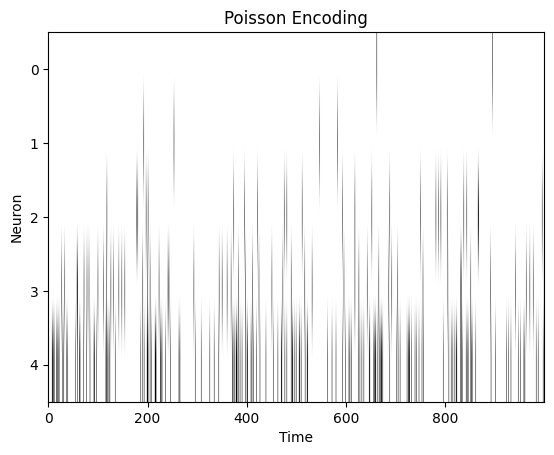

<ipython-input-66-8f2157ce59df>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  first_spike_time = torch.tensor(1.0 / rate)


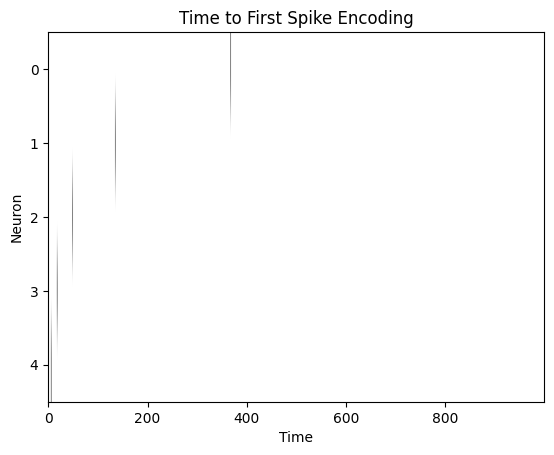

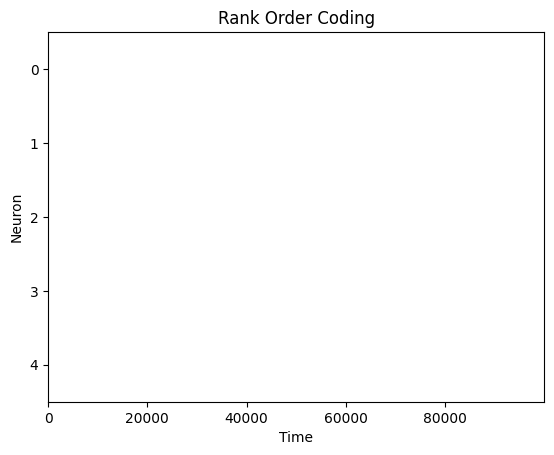

In [ ]:
# Poisson Encoding
poisson_spike_trains = poisson_encoding(currents)
plt.imshow(poisson_spike_trains, aspect='auto', cmap='binary')
plt.title("Poisson Encoding")
plt.xlabel("Time")
plt.ylabel("Neuron")
plt.show()

# Time to First Spike Encoding
ttfs_spike_trains = time_to_first_spike_encoding(currents)
plt.imshow(ttfs_spike_trains, aspect='auto', cmap='binary')
plt.title("Time to First Spike Encoding")
plt.xlabel("Time")
plt.ylabel("Neuron")
plt.show()

c_i =  torch.tensor([10, 20, 30, 40, 50])

# Rank Order Coding
roc_spike_trains = rank_order_coding(c_i)
plt.imshow(roc_spike_trains, aspect='auto', cmap='binary')
plt.title("Rank Order Coding")
plt.xlabel("Time")
plt.ylabel("Neuron")
plt.show()

## 1. رمزگذاری پواسون:
###    در رمزگذاری پواسون، هر نورون به طور مستقل با احتمالی متناسب با جریان ورودی، اسپایک هایی تولید می کند. هر چه جریان ورودی بیشتر باشد، سرعت شلیک نورون بیشتر است. در نمودار شطرنجی، مشاهده می کنید که نورون هایی با جریان ورودی بالاتر، اسپایک های بیشتری دارند، در حالی که نورون هایی با جریان ورودی کمتر، اسپایک های کمتری دارند. این روش جریان های ورودی را به عنوان نرخ شلیک نورون ها نشان می دهد.
----------------------------------------
## 2. زمان تا اولین رمزگذاری اسپایک:
### در رمزگذاری Time to First Spike (TTFS)، هر نورون یک اسپایک منفرد تولید می‌کند و زمان‌بندی اولین اسپایک با جریان ورودی نسبت عکس دارد. نورون‌هایی که جریان ورودی بالاتری دارند زودتر اسپایک می شوند، در حالی که نورون‌هایی با جریان ورودی پایین‌تر دیرتر اسپایک می‌شوند. در نمودار شطرنجی، برای هر نورون یک اسپایک مشاهده می‌کنید که زمان‌های اسپایک بر اساس جریان‌های ورودی مرتب می‌شوند. این روش جریان های ورودی را به عنوان زمان اولین اسپایک نشان می دهد.
----------------------------------------
## 3. کدگذاری ترتیب رتبه ای:
### در کدگذاری ترتیب رتبه ای (ROC)، نورون ها بر اساس جریان ورودی خود رتبه بندی می شوند و به ترتیب رتبه خود یک اسپایک تولید می کنند. نورون‌هایی که جریان ورودی بالاتری دارند، رتبه‌های بالاتری دارند و زودتر اسپایک می‌شوند، در حالی که نورون‌هایی با جریان ورودی پایین‌تر، رتبه‌های پایین‌تری دارند و اسپایک دیرتر دارند. برای هر نورون یک اسپایک وجود دارد که زمان‌های اسپایک بر اساس رتبه جریان‌های ورودی مرتب می‌شوند. این روش جریان های ورودی را به عنوان ترتیب رتبه نورون ها نشان می دهد.

